# Install Dataset

In [1]:
# !pip3 install -U ucimlrepo 

In [2]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(name='Heart Disease')

# Import library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
import matplotlib.patches as mpatches

# Read Dataset

In [4]:
da = pd.read_csv(heart_disease.metadata.data_url)

In [118]:
da.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
234,54,0,3,160,201,0,0,163,0,0.0,1,1.0,3.0,0
247,47,1,4,110,275,0,2,118,1,1.0,2,1.0,3.0,1
56,50,1,3,140,233,0,0,163,0,0.6,2,1.0,7.0,1
62,58,1,4,128,216,0,2,131,1,2.2,2,3.0,7.0,1
248,52,1,4,125,212,0,0,168,0,1.0,1,2.0,7.0,3
120,48,1,4,130,256,1,2,150,1,0.0,1,2.0,7.0,3
227,67,0,3,152,277,0,0,172,0,0.0,1,1.0,3.0,0
208,55,1,2,130,262,0,0,155,0,0.0,1,0.0,3.0,0
15,57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0
109,39,1,4,118,219,0,0,140,0,1.2,2,0.0,7.0,3


**Column Desc**

![image](../project_desc.png)

In [6]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Data Cleaning

In [7]:
da.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [8]:
da.duplicated().sum()

0

In [9]:
df = da.dropna()
df.rename(
    columns={
        'num':'target',
        'cp':'chest pain',
        'trestbps':'resting blood pressure (mm/hg)',
        'chol':'cholesterol mg/dl',
        'fbs':'fasting blood sugar (> 120 mg/dl)',
        'restecg':'rest electrocardiographic result',
        'thalach':'max-achieved heart rate',
        'exang':'exercise-induced angina',
        'oldpeak':'exercise-induced ST',
        'slope':'slope of peak exercise ST',
        'ca':'num of major vessels',
        'thal':'thalassemia',
    },
    inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                297 non-null    int64  
 1   sex                                297 non-null    int64  
 2   chest pain                         297 non-null    int64  
 3   resting blood pressure (mm/hg)     297 non-null    int64  
 4   cholesterol mg/dl                  297 non-null    int64  
 5   fasting blood sugar (> 120 mg/dl)  297 non-null    int64  
 6   rest electrocardiographic result   297 non-null    int64  
 7   max-achieved heart rate            297 non-null    int64  
 8   exercise-induced angina            297 non-null    int64  
 9   exercise-induced ST                297 non-null    float64
 10  slope of peak exercise ST          297 non-null    int64  
 11  num of major vessels               297 non-null    float64
 12 

C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\2607730743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


In [10]:
df['num of major vessels'] = df['num of major vessels'].astype('int')

C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3837291026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num of major vessels'] = df['num of major vessels'].astype('int')


In [11]:
df['target'] = df['target'].map(lambda x: "No Disease" if x == 0 else 'Disease')
df['sex'] = df['sex'].replace({1: "Male", 0: "Female"})
df['chest pain'] = df['chest pain'].replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['fasting blood sugar (> 120 mg/dl)'] = df['fasting blood sugar (> 120 mg/dl)'].replace({1: "True", 0: "False"})
df['exercise-induced angina'] = df['exercise-induced angina'].replace({1: "Yes", 0: "No"})
df['slope of peak exercise ST'] = df['slope of peak exercise ST'].replace({1: "upsloping", 2: "flat",3:"downsloping"})
df['thalassemia'] = df['thalassemia'].replace({3:"normal", 6: "fixed_defect", 7: "reversable_defect"})
df['rest electrocardiographic result X'] = df['rest electrocardiographic result'].replace({0:"normal", 1: "abnormal", 2: "hyper"})

C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3442525710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map(lambda x: "No Disease" if x == 0 else 'Disease')
C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3442525710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace({1: "Male", 0: "Female"})
C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3442525710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [12]:
df.sample(10)

,age,sex,chest pain,resting blood pressure (mm/hg),cholesterol mg/dl,fasting blood sugar (> 120 mg/dl),rest electrocardiographic result,max-achieved heart rate,exercise-induced angina,exercise-induced ST,slope of peak exercise ST,num of major vessels,thalassemia,target,rest electrocardiographic result X
191,51,Male,asymtomatic,140,298,False,0,122,Yes,4.2,flat,3,reversable_defect,Disease,normal
85,44,Male,non-anginal pain,140,235,False,2,180,No,0.0,upsloping,0,normal,No Disease,hyper
88,53,Female,asymtomatic,138,234,False,2,160,No,0.0,upsloping,0,normal,No Disease,hyper
19,49,Male,atypical_angina,130,266,False,0,171,No,0.6,upsloping,0,normal,No Disease,normal
246,58,Male,asymtomatic,100,234,False,0,156,No,0.1,upsloping,1,reversable_defect,Disease,normal
137,62,Male,atypical_angina,120,281,False,2,103,No,1.4,flat,1,reversable_defect,Disease,hyper
69,46,Male,non-anginal pain,150,231,False,0,147,No,3.6,flat,0,normal,Disease,normal
282,55,Female,asymtomatic,128,205,False,1,130,Yes,2.0,flat,1,reversable_defect,Disease,abnormal
83,68,Male,non-anginal pain,180,274,True,2,150,Yes,1.6,flat,0,reversable_defect,Disease,hyper
279,58,Female,asymtomatic,130,197,False,0,131,No,0.6,flat,0,normal,No Disease,normal


In [13]:
df.describe()

,age,resting blood pressure (mm/hg),cholesterol mg/dl,rest electrocardiographic result,max-achieved heart rate,exercise-induced ST,num of major vessels
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,0.996633,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,0.994914,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,1.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,2.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,6.200000,3.000000


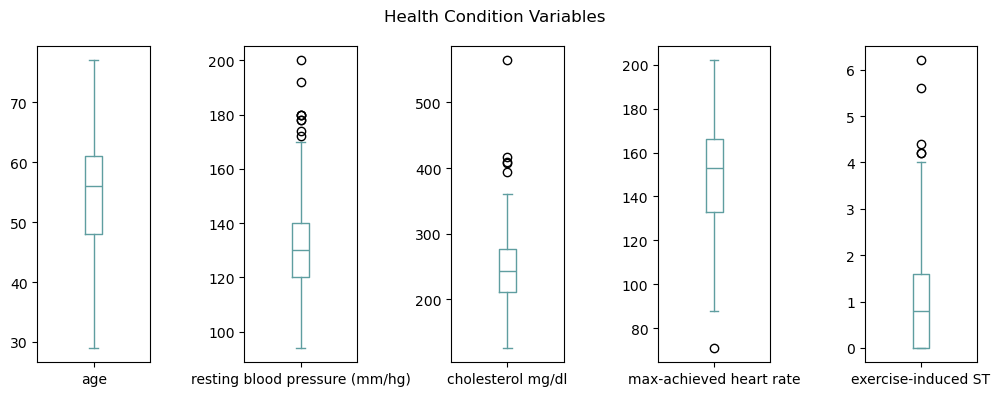

In [14]:
continous_cols = ['age','resting blood pressure (mm/hg)','cholesterol mg/dl','max-achieved heart rate','exercise-induced ST']

df[continous_cols].plot(kind='box', subplots=True, figsize=(10, 4),title='Health Condition Variables',color='cadetblue')
plt.tight_layout();

### Remove outliers

In [15]:
for col in continous_cols:
    col_data = df[col]
    Q1 = np.percentile(col_data, 25.)
    Q3 = np.percentile(col_data, 75.)
    # IQR (Inter Quartile Range)
    IQR = Q3-Q1
    outlier_step = IQR * 1.5
    outliers = col_data[~((col_data >= Q1 - outlier_step) & (col_data <= Q3 + outlier_step))].index.tolist()  
    df.drop(outliers,inplace=True)

C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3789158673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers,inplace=True)
C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3789158673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers,inplace=True)
C:\Users\xinhui\AppData\Local\Temp\ipykernel_10692\3789158673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers,inplace=True)
C:\U

In [16]:
df.shape

(278, 15)

# Data Visualization

In [17]:
def calc_plot_text(axe, series, font = 12, h = 10):
        total = series.value_counts().sum()

        for patch in [patch for patch in axe.patches if patch.get_height() > 0]:
            x = patch.get_x() + (patch.get_width() / 2)
            height = patch.get_height()
            label = f"{round((height / total) * 100, 2)}%"
            y = height - h
            axe.text(x, y, label, ha='center', va='top', fontsize=font, color='white', weight='bold')

### Numerical Variables

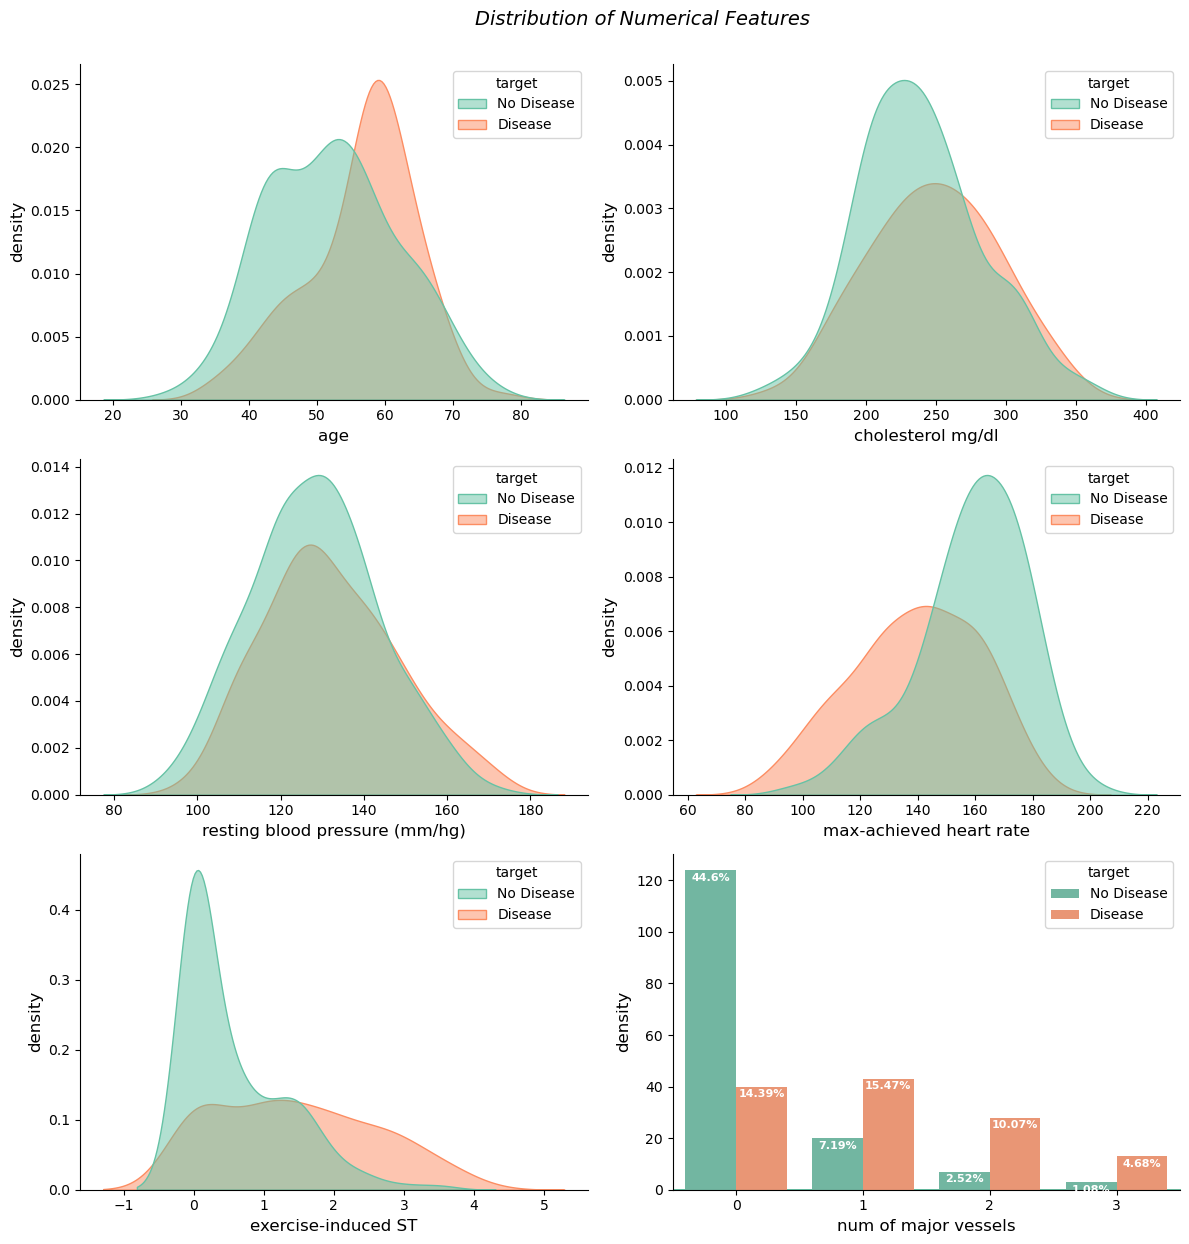

In [18]:
num_feats = ['age', 'cholesterol mg/dl', 'resting blood pressure (mm/hg)', 'max-achieved heart rate', 'exercise-induced ST', 'num of major vessels']
ncol= 2
nrow= int(np.ceil(len(num_feats)/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(12, 12))   

for i, col in enumerate(num_feats):
    plt.subplot(nrow, ncol, i + 1)
    
    ax = sns.kdeplot(data=df, x=col, hue="target", fill=True, alpha=.5, palette='Set2') 
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num of major vessels':
        sns.countplot(data=df, x=col, hue="target", palette='Set2')
        calc_plot_text(ax, df[col], font=8, h=1)
    

# plt.suptitle('Distribution of Numerical Features' ,fontsize = 18)
plt.gcf().text(.4, 1.02, 'Distribution of Numerical Features', style='oblique', size=14)
plt.tight_layout();

A higher number of blocked vessels generally indicates a more severe case of coronary artery disease

### Categorical Variables

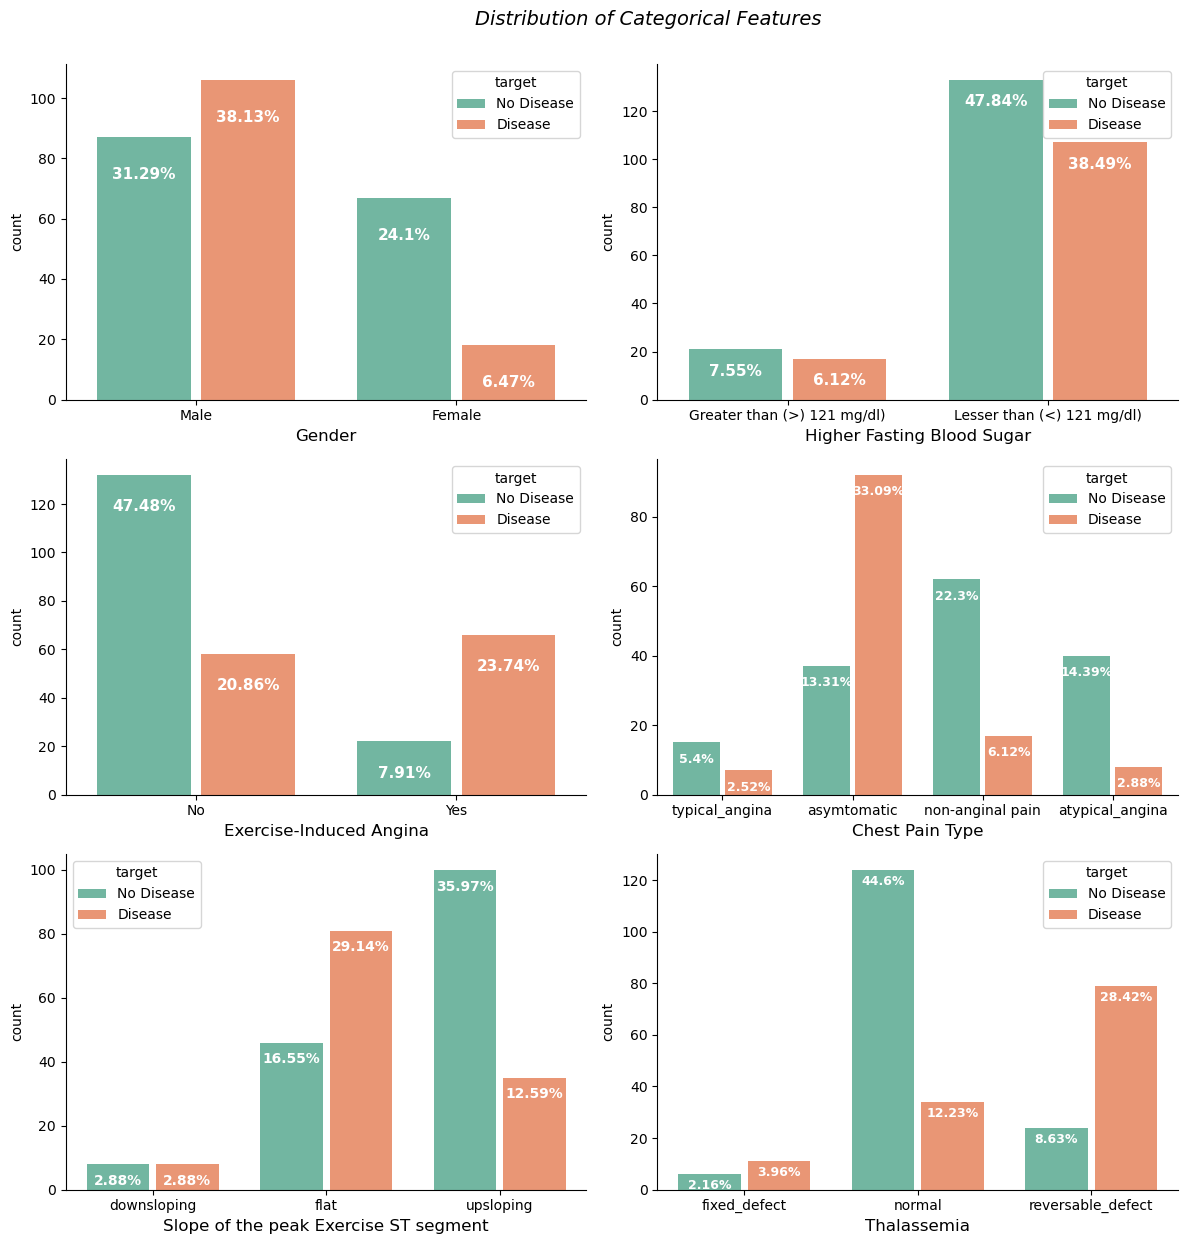

In [19]:
fig, axes = plt.subplots(3,2,figsize=(12,12))
plt.gcf().text(.4, 1.02, 'Distribution of Categorical Features', style='oblique', size=14)

axes0 = sns.countplot(df, x='sex',hue='target',gap=.1,palette='Set2',ax=axes[0,0])
axes0.set_xlabel('Gender',fontsize=12)
calc_plot_text(axes0, df['sex'],font=11)

axes1 = sns.countplot(df, x='fasting blood sugar (> 120 mg/dl)',hue='target',gap=.1,palette='Set2',ax=axes[0,1])
axes1.set_xlabel('Higher Fasting Blood Sugar',fontsize=12)
axes1.set_xticks(ticks=[0,1], labels=['Greater than (>) 121 mg/dl)', 'Lesser than (<) 121 mg/dl)'])
calc_plot_text(axes1, df['fasting blood sugar (> 120 mg/dl)'],h=6,font=11)

axes2 = sns.countplot(df, x='exercise-induced angina',hue='target',gap=.1,palette='Set2',ax=axes[1,0])
calc_plot_text(axes2, df['exercise-induced angina'],font=11)
axes2.set_xlabel('Exercise-Induced Angina',fontsize=12)

axes3 = sns.countplot(df, x='chest pain',hue='target',gap=.1,palette='Set2',ax=axes[1,1])
calc_plot_text(axes3, df['chest pain'], font=9, h=3)
axes3.set_xlabel('Chest Pain Type',fontsize=12)

axes4 = sns.countplot(df, x='slope of peak exercise ST',hue='target',gap=.1,palette='Set2',ax=axes[2,0])
calc_plot_text(axes4, df['slope of peak exercise ST'], font=10, h=3)
axes4.set_xlabel('Slope of the peak Exercise ST segment',fontsize=12)

axes5 = sns.countplot(df, x='thalassemia',hue='target',gap=.1,palette='Set2',ax=axes[2,1])
calc_plot_text(axes5, df['thalassemia'], font=9, h=2)
axes5.set_xlabel('Thalassemia',fontsize=12)

sns.despine(right=True)
sns.despine(offset=0, trim=False)
plt.tight_layout();

Slope
- upsloping: indicate normal or minimal ischemia (reduced blood flow to the heart muscle)
- flat: indeterminate finding and doesn't necessarily suggest a problem
- downsloping: can be a sign of more significant ischemia or heart disease

# Comparative/Correlation Analysis

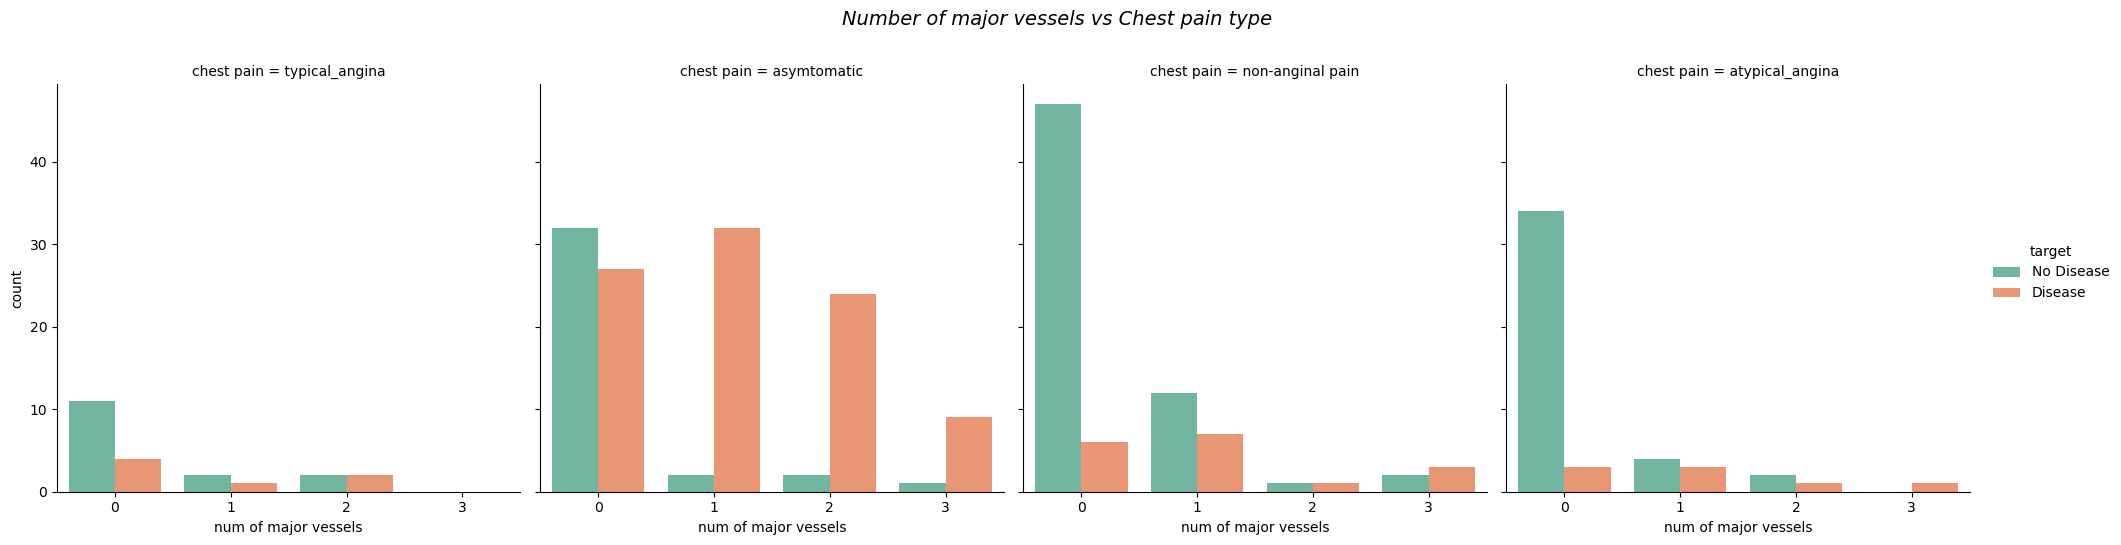

In [20]:
sns.catplot(df, x="num of major vessels", hue="target", palette='Set2', col="chest pain", kind='count')
plt.gcf().text(.4, 1.05, 'Number of major vessels vs Chest pain type', style='oblique', size=14);

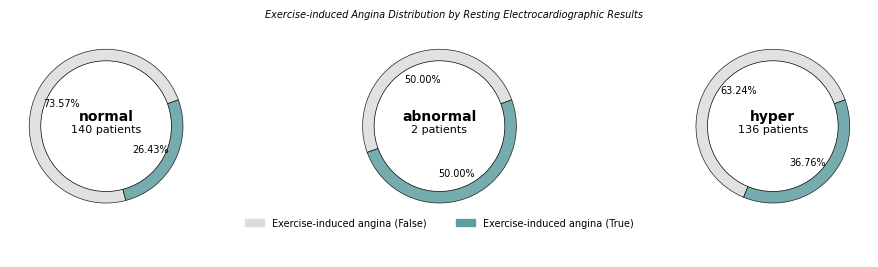

In [21]:
df_eda3 = df[['exercise-induced angina', 'rest electrocardiographic result X']]
df_eda3 = pd.DataFrame(df_eda3.groupby(['exercise-induced angina', 'rest electrocardiographic result X']).size().reset_index(name='total'))
df_eda3_0 = df_eda3[df_eda3['rest electrocardiographic result X'] == 'normal'].drop('rest electrocardiographic result X', axis=1)
df_eda3_1 = df_eda3[df_eda3['rest electrocardiographic result X'] == 'abnormal'].drop('rest electrocardiographic result X', axis=1)
df_eda3_2 = df_eda3[df_eda3['rest electrocardiographic result X'] == 'hyper'].drop('rest electrocardiographic result X', axis=1)

total_list = [df_eda3_0['total'], df_eda3_1['total'], df_eda3_2['total']]
ecg_types = ['normal','abnormal','hyper']
suptitle = dict(x=0.5, y=0.94, fontsize=14, weight='heavy', ha='center', va='center')
exp_text = dict(x=0.5, y=0.17, fontsize=6, weight='normal', ha='center', va='center', textalign='center')
highlight_explanation = [{'weight':'bold', 'color': 'gainsboro'}, {'weight':'bold', 'color': 'gainsboro'}, {'weight':'bold', 'color': 'cadetblue'}]
l_120mg = mpatches.Patch(color='gainsboro', label='Exercise-induced angina (False)')
m_120mg = mpatches.Patch(color='cadetblue', label='Exercise-induced angina (True)')

def display_eda3(subplot_num, ecg_type, total, colors, start_angle):
    centre = plt.Circle((0, 0), 0.85, fc='white', edgecolor='black', linewidth=0.5)
    total_patients = total.sum()
    
    plt.subplot(1, 3, subplot_num)
    plt.tight_layout(rect=[0, 0, 1, 1.01])
    plt.pie(total, colors=colors, autopct='%.2f%%', pctdistance=0.65, startangle=start_angle, wedgeprops=dict(alpha=0.85, edgecolor='black', linewidth=0.5), textprops={'fontsize': 7})
    plt.text(0, 0.08, ecg_types[ecg_type], weight='bold', ha='center', fontsize=10)
    plt.text(0, -0.08, f"{total_patients} patients", ha='center', fontsize=8)
    fig=plt.gcf()
    fig.gca().add_artist(centre)

plt.figure(figsize=(9, 4))
for idx, total in enumerate(total_list):
    display_eda3(idx+1, idx, total, ['gainsboro', 'cadetblue'], 20)
    if idx == 1: plt.legend(handles=[l_120mg, m_120mg], loc='upper center', bbox_to_anchor=(0.5, .2), ncol=2, borderpad=3, frameon=False, fontsize=7, columnspacing=3)
# fig_text(s="Fasting Blood Sugar Distribution by Resting Electrocardiographic Results", **suptitle)
# fig_text(s="<Resting electrocardiograph type 0 and 1 have higher distribution> compared to type 2.\n<Only type 0 and 1 have patients with fasting blood sugar over 120 mg/dl>, while <type 2 does not>", highlight_textprops=highlight_explanation, **exp_text)
plt.gcf().text(.3, .8, 'Exercise-induced Angina Distribution by Resting Electrocardiographic Results', style='italic', fontsize=7)
plt.show()

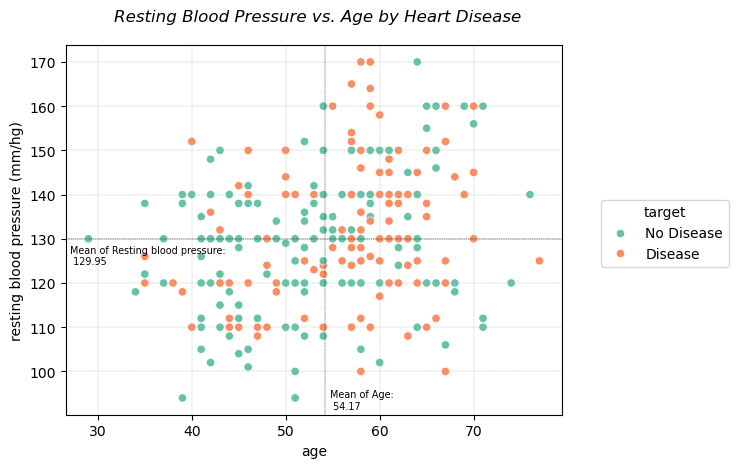

In [22]:
rbp_mean, age_mean = round(df['resting blood pressure (mm/hg)'].mean(),2), round(df['age'].mean(),2)

sns.scatterplot(df, x='age', y='resting blood pressure (mm/hg)', hue='target', palette='Set2')
plt.grid(True, ls='--', lw=.3)
plt.axhline(rbp_mean, lw=.3, color='k', ls='--')
plt.text(27, rbp_mean * 0.99, va='top', ha='left', s=f'Mean of Resting blood pressure: \n {rbp_mean}', size='x-small')
plt.axvline(age_mean, lw=.3, color='k', ls='--')
plt.text(age_mean * 1.01, 96, va='top', ha='left', s=f'Mean of Age: \n {age_mean}', size='x-small')
plt.legend(title='target', bbox_to_anchor=(1.35, .6), borderaxespad=.5)
plt.gcf().text(.2, .93, 'Resting Blood Pressure vs. Age by Heart Disease', style='oblique', size=12);

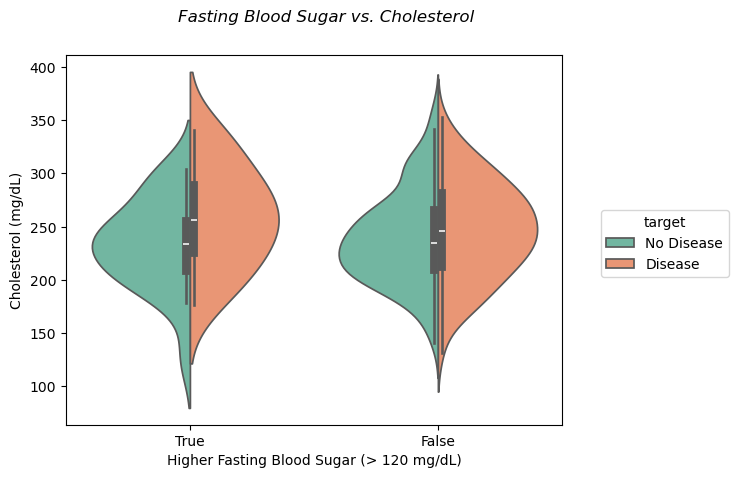

In [23]:
sns.violinplot(
    x = "fasting blood sugar (> 120 mg/dl)",
    y = "cholesterol mg/dl",
    data=df,
    hue='target',
    split=True,
    palette='Set2'
)
plt.gcf().text(.3, .95, 'Fasting Blood Sugar vs. Cholesterol', style='oblique', size=12)
plt.xlabel('Higher Fasting Blood Sugar (> 120 mg/dL)')
plt.ylabel('Cholesterol (mg/dL)')
plt.legend(title='target', bbox_to_anchor=(1.35, .6), borderaxespad=.5);

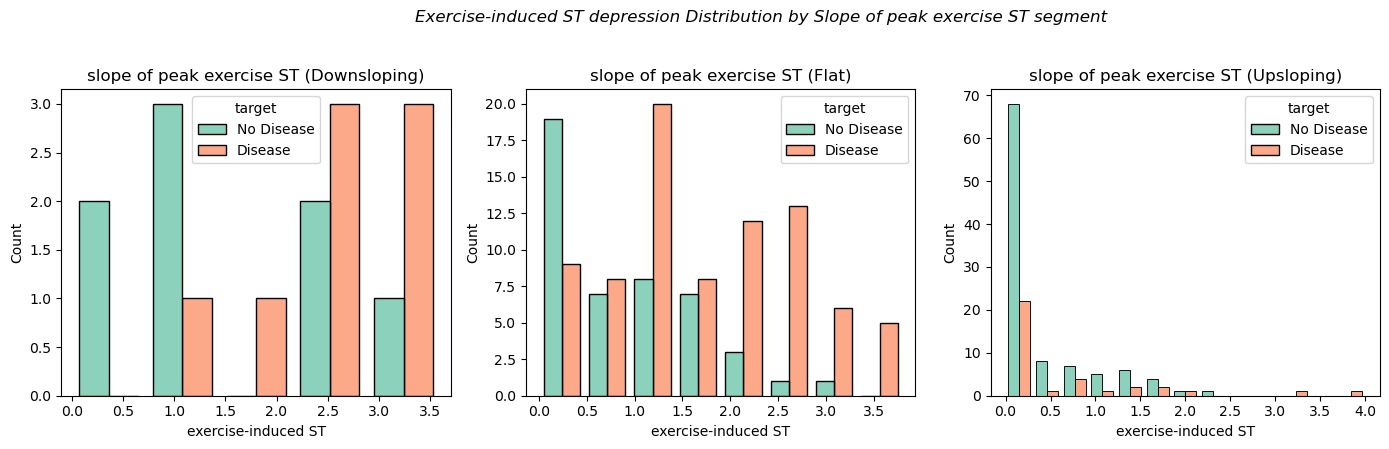

In [24]:
# sns.catplot(df, x='exercise-induced ST', kind='swarm', col='slope of peak exercise ST');

plt.figure(figsize=(14,4))
ax1 = plt.subplot(131)
ax1.set_title('slope of peak exercise ST (Downsloping)')
sns.histplot(data=df, x=df[df['slope of peak exercise ST'] == 'downsloping']["exercise-induced ST"], hue="target", multiple="dodge", shrink=.8, palette='Set2')

ax2 = plt.subplot(132)
ax2.set_title('slope of peak exercise ST (Flat)')
sns.histplot(data=df, x=df[df['slope of peak exercise ST'] == 'flat']["exercise-induced ST"], hue="target", multiple="dodge", shrink=.8, palette='Set2')

ax3 = plt.subplot(133)
ax3.set_title('slope of peak exercise ST (Upsloping)')
sns.histplot(data=df, x=df[df['slope of peak exercise ST'] == 'upsloping']["exercise-induced ST"], hue="target", multiple="dodge", shrink=.8, palette='Set2')

plt.gcf().text(.3, 1.08, 'Exercise-induced ST depression Distribution by Slope of peak exercise ST segment', style='oblique', size=12)
plt.tight_layout();


# Machine Learning

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [26]:
df.sample()

,age,sex,chest pain,resting blood pressure (mm/hg),cholesterol mg/dl,fasting blood sugar (> 120 mg/dl),rest electrocardiographic result,max-achieved heart rate,exercise-induced angina,exercise-induced ST,slope of peak exercise ST,num of major vessels,thalassemia,target,rest electrocardiographic result X
254,43,Male,asymtomatic,115,303,False,0,181,No,1.2,flat,0,normal,No Disease,normal


### Split train test data and scale

In [100]:
X = df.drop(['target','rest electrocardiographic result X'],axis=1)
y = df['target']

In [28]:
y = y.map({'No Disease':0,'Disease':1})

In [102]:
X.values

array([[63, 'Male', 'typical_angina', ..., 'downsloping', 0,
        'fixed_defect'],
       [67, 'Male', 'asymtomatic', ..., 'flat', 3, 'normal'],
       [67, 'Male', 'asymtomatic', ..., 'flat', 2, 'reversable_defect'],
       ...,
       [68, 'Male', 'asymtomatic', ..., 'flat', 2, 'reversable_defect'],
       [57, 'Male', 'asymtomatic', ..., 'flat', 1, 'reversable_defect'],
       [57, 'Female', 'atypical_angina', ..., 'flat', 1, 'normal']],
      dtype=object)

In [103]:
encoder = LabelEncoder()

encode_cols = ['sex','chest pain','fasting blood sugar (> 120 mg/dl)','exercise-induced angina','slope of peak exercise ST','thalassemia']
for col in encode_cols:
    X[col] = encoder.fit_transform(X[col])

In [105]:
X['sex']

0      1
1      1
2      1
3      1
4      0
      ..
297    0
298    1
299    1
300    1
301    0
Name: sex, Length: 278, dtype: int32

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Pipeline

In [32]:
classifiers = {
    'XGBoost': XGBClassifier(random_state=7),
    'Logistic Regression': LogisticRegression(random_state=7),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Bagging (Decision Trees)': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    'AdaBoost (Decision Trees)': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'GaussianNB': GaussianNB()
}

for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('classifier', classifier)              
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*80 + "\n")

Results for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        34
           1       0.77      0.91      0.83        22

    accuracy                           0.86        56
   macro avg       0.85      0.87      0.85        56
weighted avg       0.87      0.86      0.86        56


--------------------------------------------------------------------------------

Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.86      0.86      0.86        22

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56


--------------------------------------------------------------------------------

Results for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85 

### Logistic Regression

In [33]:
lr_model = LogisticRegression(random_state=7)
lr_model

LogisticRegression(random_state=7)

In [34]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [35]:
y_pred = lr_model.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.8928571428571429

In [37]:
lr_model.coef_[0]

array([-0.00900794,  0.62648676, -0.82879739,  0.37787302,  0.45380454,
       -0.09396448,  0.24587573, -0.61161099,  0.28824274,  0.57058193,
       -0.40333001,  1.17502373,  0.70130611])

In [38]:
feature_importance = pd.DataFrame(
    {'feature':list(X.columns),
     'importance': lr_model.coef_[0]
    }
).sort_values('importance',ascending=False)

In [39]:
feature_importance

,feature,importance
11,num of major vessels,1.175024
12,thalassemia,0.701306
1,sex,0.626487
9,exercise-induced ST,0.570582
4,cholesterol mg/dl,0.453805
3,resting blood pressure (mm/hg),0.377873
8,exercise-induced angina,0.288243
6,rest electrocardiographic result,0.245876
0,age,-0.009008
5,fasting blood sugar (> 120 mg/dl),-0.093964


In [40]:
# features = X.columns
# indices = np.argsort(lr_model.coef_[0])
# plt.bar(range(len(indices)), np.sort(lr_model.coef_[0]), color='y')
# plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
# plt.ylabel('Relative Importance')
# plt.title('Feature Importances')
# plt.show()

In [41]:
lr_report = classification_report(y_test, y_pred,)
print(lr_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.86      0.86      0.86        22

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56



In [42]:
lr_cm = confusion_matrix(y_test, y_pred)

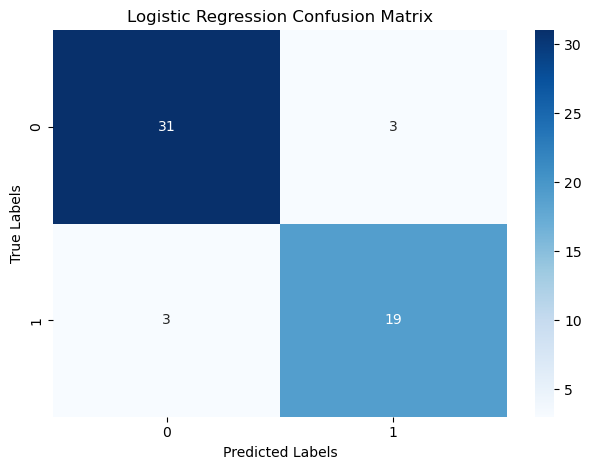

In [43]:
ax = plt.gca()
sns.heatmap(lr_cm, annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout();

### GridSearch

In [44]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
parameters = {
    'penalty' : [None, 'l1', 'l2', 'elasticnet'],
    'dual': [True, False], 
    'fit_intercept': [True, False], 
    'n_jobs': [None, 0, 1, 2, 3, 4], 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [46]:
gr_reg = GridSearchCV(lr_model, parameters, scoring='accuracy', cv=5)

In [47]:
gr_reg.fit(X_train, y_train)

c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [None, 0, 1, 2, 3, 4],
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [48]:
gr_reg.best_params_

{'dual': True,
 'fit_intercept': True,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [49]:
lr_model2 = LogisticRegression(
    dual= True,
    fit_intercept= True,
    multi_class= 'auto',
    n_jobs= None,
    penalty= 'l2',
    solver= 'liblinear',
    random_state=42)

In [50]:
lr_model2.fit(X_train, y_train)

LogisticRegression(dual=True, random_state=42, solver='liblinear')

In [51]:
lr_pred2 = lr_model2.predict(X_test)

In [52]:
accuracy_score(y_test,lr_pred2)

0.8928571428571429

### MLP

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [55]:
mlp.fit(X_train,y_train)

c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [56]:
mlp_pred = mlp.predict(X_test)
mlp_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [57]:
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

[[29  5]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.77      0.77      0.77        22

    accuracy                           0.82        56
   macro avg       0.81      0.81      0.81        56
weighted avg       0.82      0.82      0.82        56



## Predict using dummy data

In [137]:
dummy = [[57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,]]

In [138]:
def predictDummyData(dummy_data):
    dummy_data[0][1] = "Male" if dummy_data[0][1] == 1 else "Female"
    dummy_data[0][2] = "typical_angina" if dummy_data[0][2] == 1 else "atypical_angina" if dummy_data[0][2] == 2 else "non-anginal pain" if dummy_data[0][2] == 3 else "asymtomatic"
    dummy_data[0][5] = "True" if dummy_data[0][5] == 1 else "False"
    dummy_data[0][8] = "Yes" if dummy_data[0][8] == 1 else "No"
    dummy_data[0][10] = "upsloping" if dummy_data[0][10] == 1 else "flat" if dummy_data[0][10] == 2 else "downsloping"
    dummy_data[0][11] = int(dummy_data[0][11])
    dummy_data[0][12] = "normal" if dummy_data[0][12] == 3 else "fixed_defect" if dummy_data[0][12] == 6 else "reversable_defect"
    for col in [1,2,5,8,10,12]:
        dummy_data[0][col] = encoder.fit_transform([dummy_data[0][col]])[0]
    dummy_scaled = scaler.transform(dummy_data)
    return 'Dicease' if lr_model2.predict(dummy_scaled)[0] == 1 else 'No Dicease'

In [139]:
predictDummyData(dummy)

c:\Users\xinhui\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'No Dicease'

streamlit or gradio or shiney